In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
ACTIONS = {'U': (-1, 0), 'D': (1, 0), 'L': (0, -1), 'R': (0, 1)}
class Planet(object):
    def __init__(self):
        # start with defining your planet
        self.planet = np.zeros((6, 6))
        self.planet[2, 1] = 2
        self.planet[3, 4] = 1
        self.planet[4, 2] = 1
        self.planet[0, 2] = 1
        self.planet[2, 0] = 1
        self.robot_position = (1, 2) # current robot position
        self.steps = 0 # contains num steps robot took
        self.allowed_states = None # for now, this is none
        self.construct_allowed_states() 
    def is_allowed_move(self, state, action):
        y, x = state
        y += ACTIONS[action][0]
        x += ACTIONS[action][1]
        # moving off the board
        if y < 0 or x < 0 or y > 5 or x > 5:
             return False
        # moving into start position or empty space
        if self.planet[y, x] == 0 or self.planet[y, x] == 2:
            return True
        else:
            return False
    def construct_allowed_states(self):
        allowed_states = {}
        for y, row in enumerate(self.planet):
            for x, col in enumerate(row):
                # iterate through all valid spaces
                if self.planet[(y,x)] != 1:
                    allowed_states[(y,x)] = []
                    for action in ACTIONS:
                        if self.is_allowed_move((y, x), action):
                            allowed_states[(y,x)].append(action)
        self.allowed_states = allowed_states
    def update_planet(self, action):
        y, x = self.robot_position
        self.planet[y, x] = 0 # set the current position to empty
        y += ACTIONS[action][0]
        x += ACTIONS[action][1]
        self.robot_position = (y, x)
        self.planet[y, x] = 2
        self.steps += 1
    def is_game_over(self):
        if self.robot_position == (5, 5):
            return True
        return False
    def give_reward(self, state_history):
        if self.robot_position == (5, 5):
            return 0
        else:
            return -1
    def get_state_and_reward(self, state_history):
        return self.robot_position, self.give_reward(state_history)

In [5]:
ACTIONS = {'U': (-1, 0), 'D': (1, 0), 'L': (0, -1), 'R': (0, 1)}
class Agent(object):
    def __init__(self, states, alpha=0.15, random_factor=0.2):
        self.state_history = [((0, 0), 0)] # state, reward
        self.alpha = alpha
        self.random_factor = random_factor
        
        # start the rewards table
        self.G = {}
        self.init_reward(states)
    def init_reward(self, states):
        for i, row in enumerate(states):
            for j, col in enumerate(row):
                self.G[(j,i)] = np.random.uniform(high=1.0, low=0.1)
    def update_state_history(self, state, reward):
        self.state_history.append((state, reward))
    def learn(self):
        target = 0 # we know the "ideal" reward
        a = self.alpha
        for state, reward in reversed(self.state_history):
            self.G[state] = (1-a) * self.G[state] + a * target #self.G[state]+ a * (target - self.G[state])
        self.state_history = [] # reset the state_history
        self.random_factor -= 10e-5 # decrease random_factor
    def choose_action(self, state, allowed_moves):
        next_move = None
        n = np.random.random()
        if n < self.random_factor:
            next_move = np.random.choice(allowed_moves)
        else:
            maxG = -10e15 # some really small random number
            for action in allowed_moves:
                new_state = tuple([sum(x) for x in zip(state, ACTIONS[action])])
                if self.G[new_state] >= maxG:
                    next_move = action
                    maxG = self.G[new_state]
        return next_move

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000


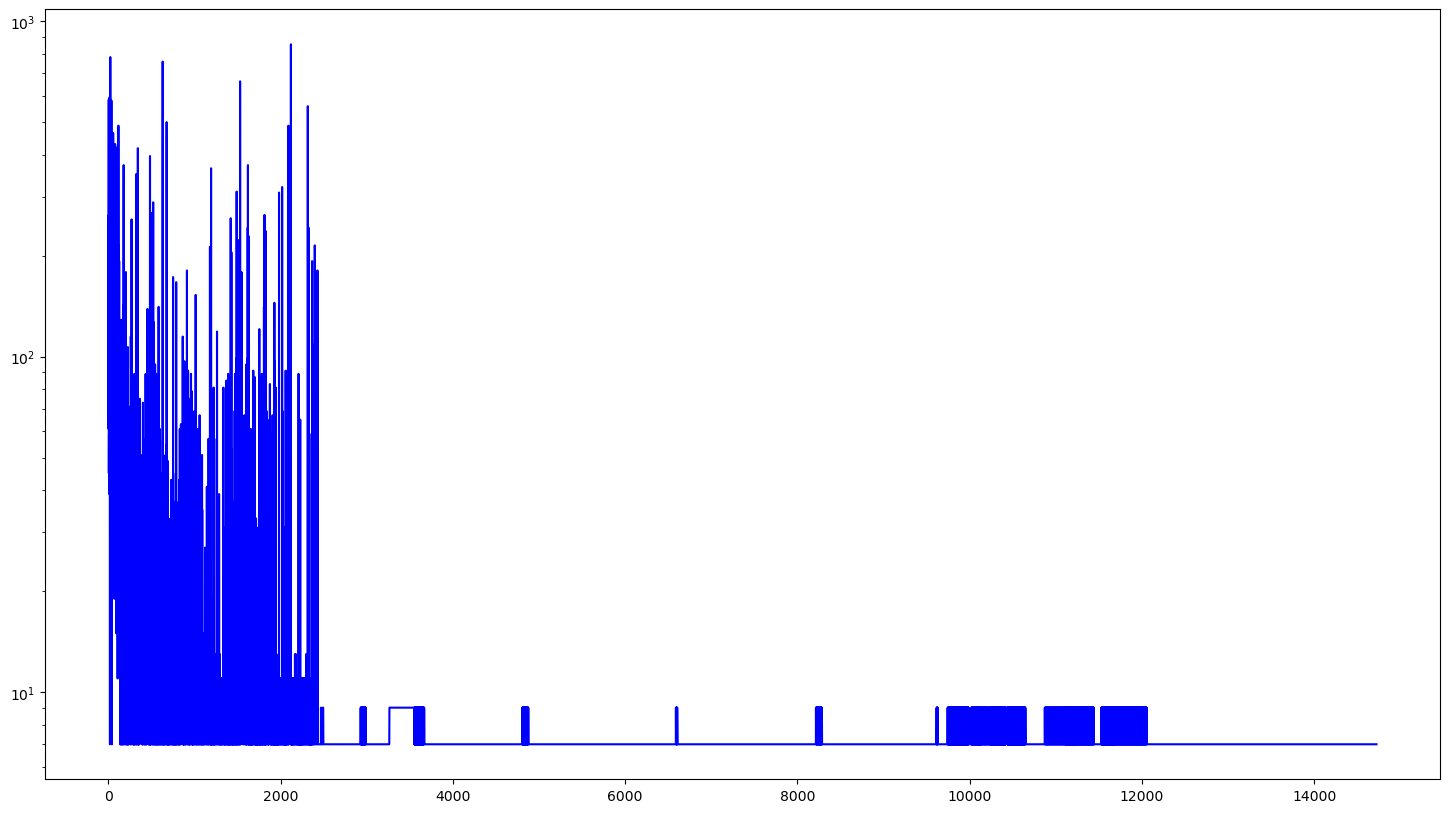

In [7]:
if __name__ == '__main__':
    planet = Planet()
    robot = Agent(planet.planet, alpha=0.001, random_factor=0.25)
    moveHistory = []

    for i in range(15000):
        if i % 1000 == 0:            
            print(i)
            
        while not planet.is_game_over():
            sHistory = robot.state_history
            state, _ = planet.get_state_and_reward(sHistory) # get the current state
            action = robot.choose_action(state, planet.allowed_states[state]) # choose an action (explore or exploit)
            planet.update_planet(action) # update the planet according to the action
            state, reward = planet.get_state_and_reward(sHistory) # get the new state and reward
            robot.update_state_history(state, reward) # update the robot memory with state and reward
            if planet.steps > 1000:
                # end the robot if it takes too long to find the goal
                planet.robot_position = (5, 5)

        robot.learn() # robot should learn after every episode
        if planet.steps < 1000:
            moveHistory.append(planet.steps) # get a history of number of steps taken to plot later
        planet = Planet() # reinitialize the planet
        
plt.figure(figsize=(18, 10))
plt.semilogy(moveHistory, "b")
plt.show()

0
1000


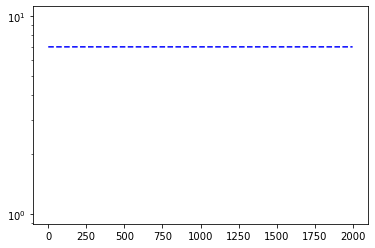

In [7]:
testHistory = []
for i in range(2000):
        if i % 1000 == 0:            
            print(i)
            
        planet = Planet()
        while not planet.is_game_over():
            sHistory = robot.state_history
            state, _ = planet.get_state_and_reward(sHistory) # get the current state
            action = robot.choose_action(state, planet.allowed_states[state]) # choose an action (explore or exploit)
            planet.update_planet(action) # update the planet according to the action
            state, reward = planet.get_state_and_reward(sHistory) # get the new state and reward
            robot.update_state_history(state, reward) # update the robot memory with state and reward
            if planet.steps > 1000:
                # end the robot if it takes too long to find the goal
                planet.robot_position = (5, 5)
            #print(planet.planet)
        testHistory.append(planet.steps)
plt.semilogy(testHistory, "b--")
plt.show()